# SWAP gates

$
\text{SWAP} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$

The SWAP gate converts a Bell state leaves it unchanged except for the $|\Psi^-\rangle$ state, which gets a negative sign.

$\text{SWAP} |\Phi^+\rangle = |\Phi^+\rangle$

$\text{SWAP} |\Phi^-\rangle = |\Phi^-\rangle$

$\text{SWAP} |\Psi^+\rangle = |\Psi^+\rangle$

$\text{SWAP} |\Psi^-\rangle = -|\Psi^-\rangle$

See [Bell states notebook](bell_states.ipynb) for more details.

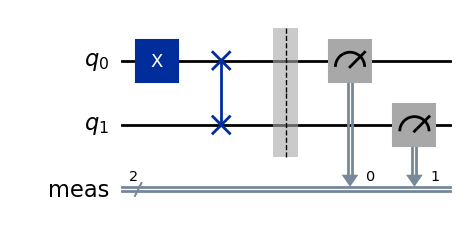

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SwapGate

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Let's apply X gates to the first qubit
qc.x(0)

# Apply a SWAP gate
qc.append(SwapGate(), [0, 1])

# Measure the qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')

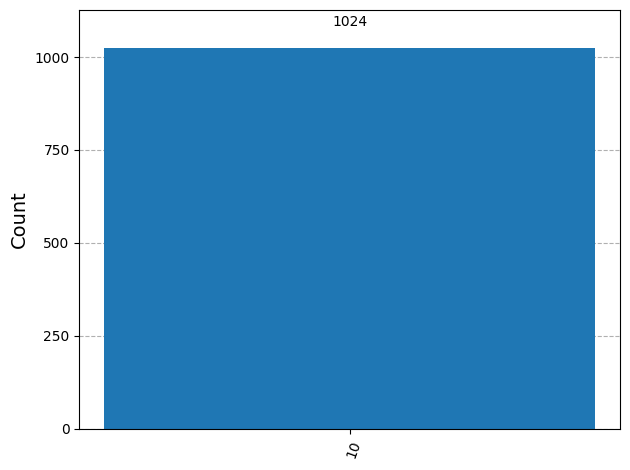

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Transpile the circuit for the simulator
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)

# Execute the circuit on the simulator
job = backend.run(transpiled_qc)
result = job.result()

# Get the counts of the results
counts = result.get_counts(transpiled_qc)

# Plot the results
plot_histogram(counts)

## Controlled-SWAP (Fredkin) gate

$|0\rangle \langle 0| \otimes \mathbf{I}_4 + |1\rangle \langle 1| \otimes \text{SWAP} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$

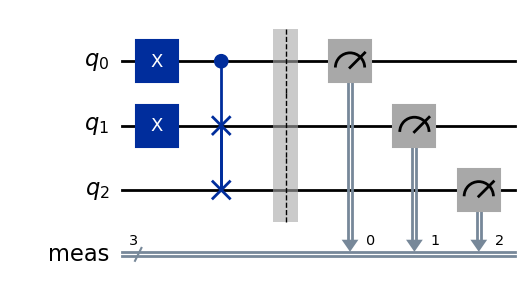

In [4]:
qc = QuantumCircuit(3)

# Let's set qubit 0 and 1 to |1> state
qc.x(0)
qc.x(1)

# Apply a controlled SWAP (CSWAP) gate
# This will swap qubit 1 and 2 if qubit 0 is in state |1>
qc.cswap(0, 1, 2)

# Measure the qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')

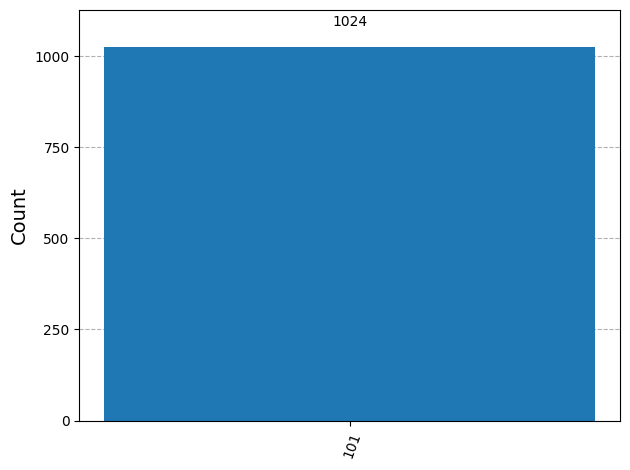

In [5]:
# Transpile the circuit for the simulator
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)

# Execute the circuit on the simulator
job = backend.run(transpiled_qc)
result = job.result()

# Get the counts of the results
counts = result.get_counts(transpiled_qc)

# Plot the results
plot_histogram(counts)